In [1]:
import torch
import torch.nn.functional as F
import numpy as np

from matplotlib import pyplot as plt
import sys
sys.path.append('E:/Projects/XAI/BHEM')
sys.path.append('/umich/Library/Mobile Documents/com~apple~CloudDocs/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')
from model import Cnn, getClassifier
from dataset import handwriting
from utils import reconstruct_mask, basic_segment, quickshift

pred_softmax: torch.Size([50, 10])


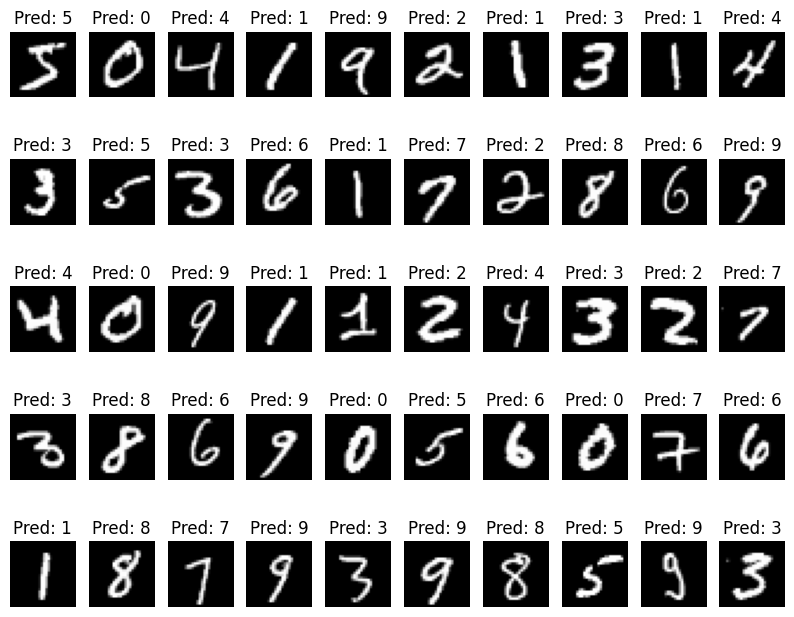

In [2]:
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

cnn = getClassifier(Cnn, device, f_params='../../MINST.pkl')

# %% Load MINST dataset
mnist = handwriting('mnist_784', normalize=True)

testnum = 50
Images = torch.from_numpy(mnist.XCnn[:testnum]).to(device)

# y_pred = torch.from_numpy(cnn.predict(Images))

y_pred_logits = torch.from_numpy(cnn.predict_proba(Images))
pred_softmax = F.softmax(y_pred_logits, dim=1)
print(f"pred_softmax: {pred_softmax.shape}")
top_n = pred_softmax.topk(1)

# print(top_n.indices, top_n.values.shape)
# print(y_pred_logits)

plt.figure(figsize=(10, 8))
for i in range(testnum):
    plt.subplot(5, 10, i+1)
    plt.imshow(Images[i].cpu().reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {top_n.indices[i].item()}")
    plt.axis('off')
plt.show()

In [3]:
test_ID = 39
Images[test_ID].shape

torch.Size([1, 28, 28])

In [4]:
cnn.predict_proba(Images).shape

(50, 10)

In [5]:
from skimage.color import gray2rgb

In [6]:
def lime_predict(z):
    """In `explainer.explain_instance()` method, the 2D image is converted to 3D by adding a channel dimension"""
    z = z[:, :, :, 0]
    return cnn.predict_proba(z[:,np.newaxis,:,:])

In [7]:
from lime import lime_image
basic_seg = basic_segment(Images)
explainer = lime_image.LimeImageExplainer()
# explanation = explainer.explain_instance(np.array(Images[test_ID].squeeze(0).cpu()), 
#                                         lime_predict, # 分类预测函数
#                                         top_labels=5,
#                                         hide_color=0,
#                                         num_features=196, # 特征数
#                                         num_samples=5000, # LIME生成的邻域图像个数
#                                         segmentation_fn=lambda img: quickshift(img, kernel_size=4, max_dist=10, ratio=0.2)
#                                         )
explanation = explainer.explain_instance(np.array(Images[test_ID].squeeze(0).cpu()), 
                                        lime_predict, # 分类预测函数
                                        top_labels=5,
                                        hide_color=0,
                                        num_features=784, # 特征数
                                        num_samples=5000, # LIME生成的邻域图像个数
                                        segmentation_fn=basic_seg.get_mask
                                        )

/home/xiangyu/.conda/envs/PyTc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [00:02<00:00, 2258.89it/s]


In [8]:
explanation.top_labels[0]

6

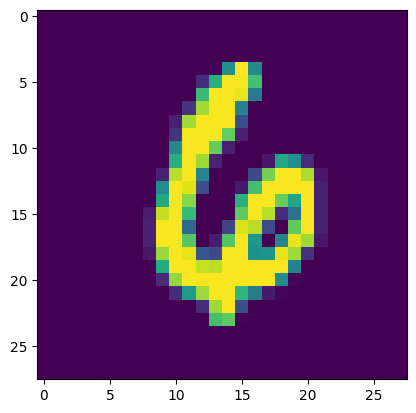

In [9]:
plt.imshow(Images[test_ID].cpu().reshape(28, 28))

In [10]:
from skimage.segmentation import mark_boundaries

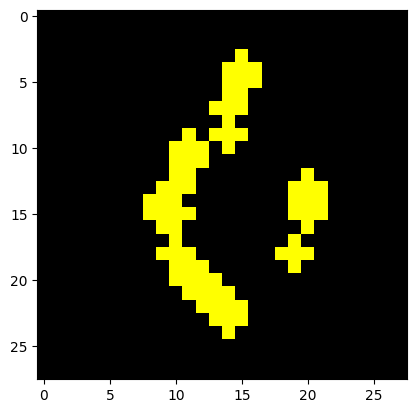

In [11]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=20, hide_rest=False)
img_boundry = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry)
plt.show()

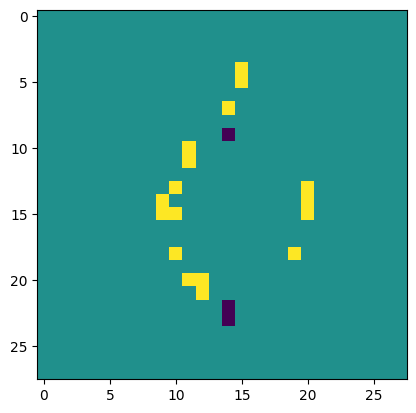

In [12]:
plt.imshow(mask)

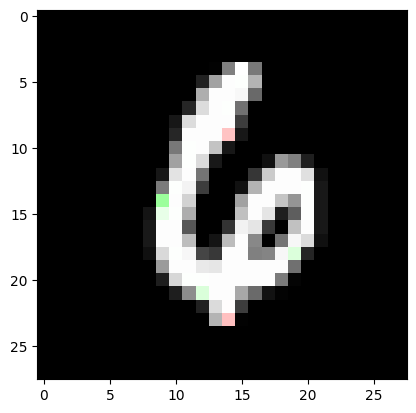

In [13]:
plt.imshow(temp)

In [14]:

for i in temp:
 print(i)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [

# Test `LimeExp` class 

In [15]:
from lime_exp import LimeExp

In [16]:
lime_exp = LimeExp(Images[test_ID], basic_seg.get_mask, num_features=784, num_samples=5000)

100%|██████████| 5000/5000 [00:02<00:00, 2248.23it/s]


In [21]:
Images[test_ID].shape

torch.Size([1, 28, 28])

In [17]:
exp_values = lime_exp.get_exp_values()